In [170]:
# Data Manipulation Libraries: Standard dataframes and array libraries
import pandas as pd
import numpy as np
# from datetime import datetime
import datetime

# Data Visualization Libraries:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns
import statsmodels.api as sm
# Import roc_curve
from sklearn.metrics import roc_curve
from mlxtend.plotting import plot_confusion_matrix

# Data Analysis: Statistics and Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Displaying plots in jupter notebook
%matplotlib inline
# Displaying pandas columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [144]:
# import data using read_csv() method
df = pd.read_csv("static/data/churn.csv")

### Data Wrangling

In [145]:
# Evaluate datatypes
df.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [146]:
# Drop unnecessary columns
df = df.drop(['Area_Code', 'Phone'], axis=1)

In [147]:
# Get list of columns that are object data types
numeric_columns = []
for col in df.columns:
    if (df[col].dtypes == int) | (df[col].dtypes == float):
        numeric_columns.append(col)

### Exploratory Data Analysis

### Evaluate data distribution

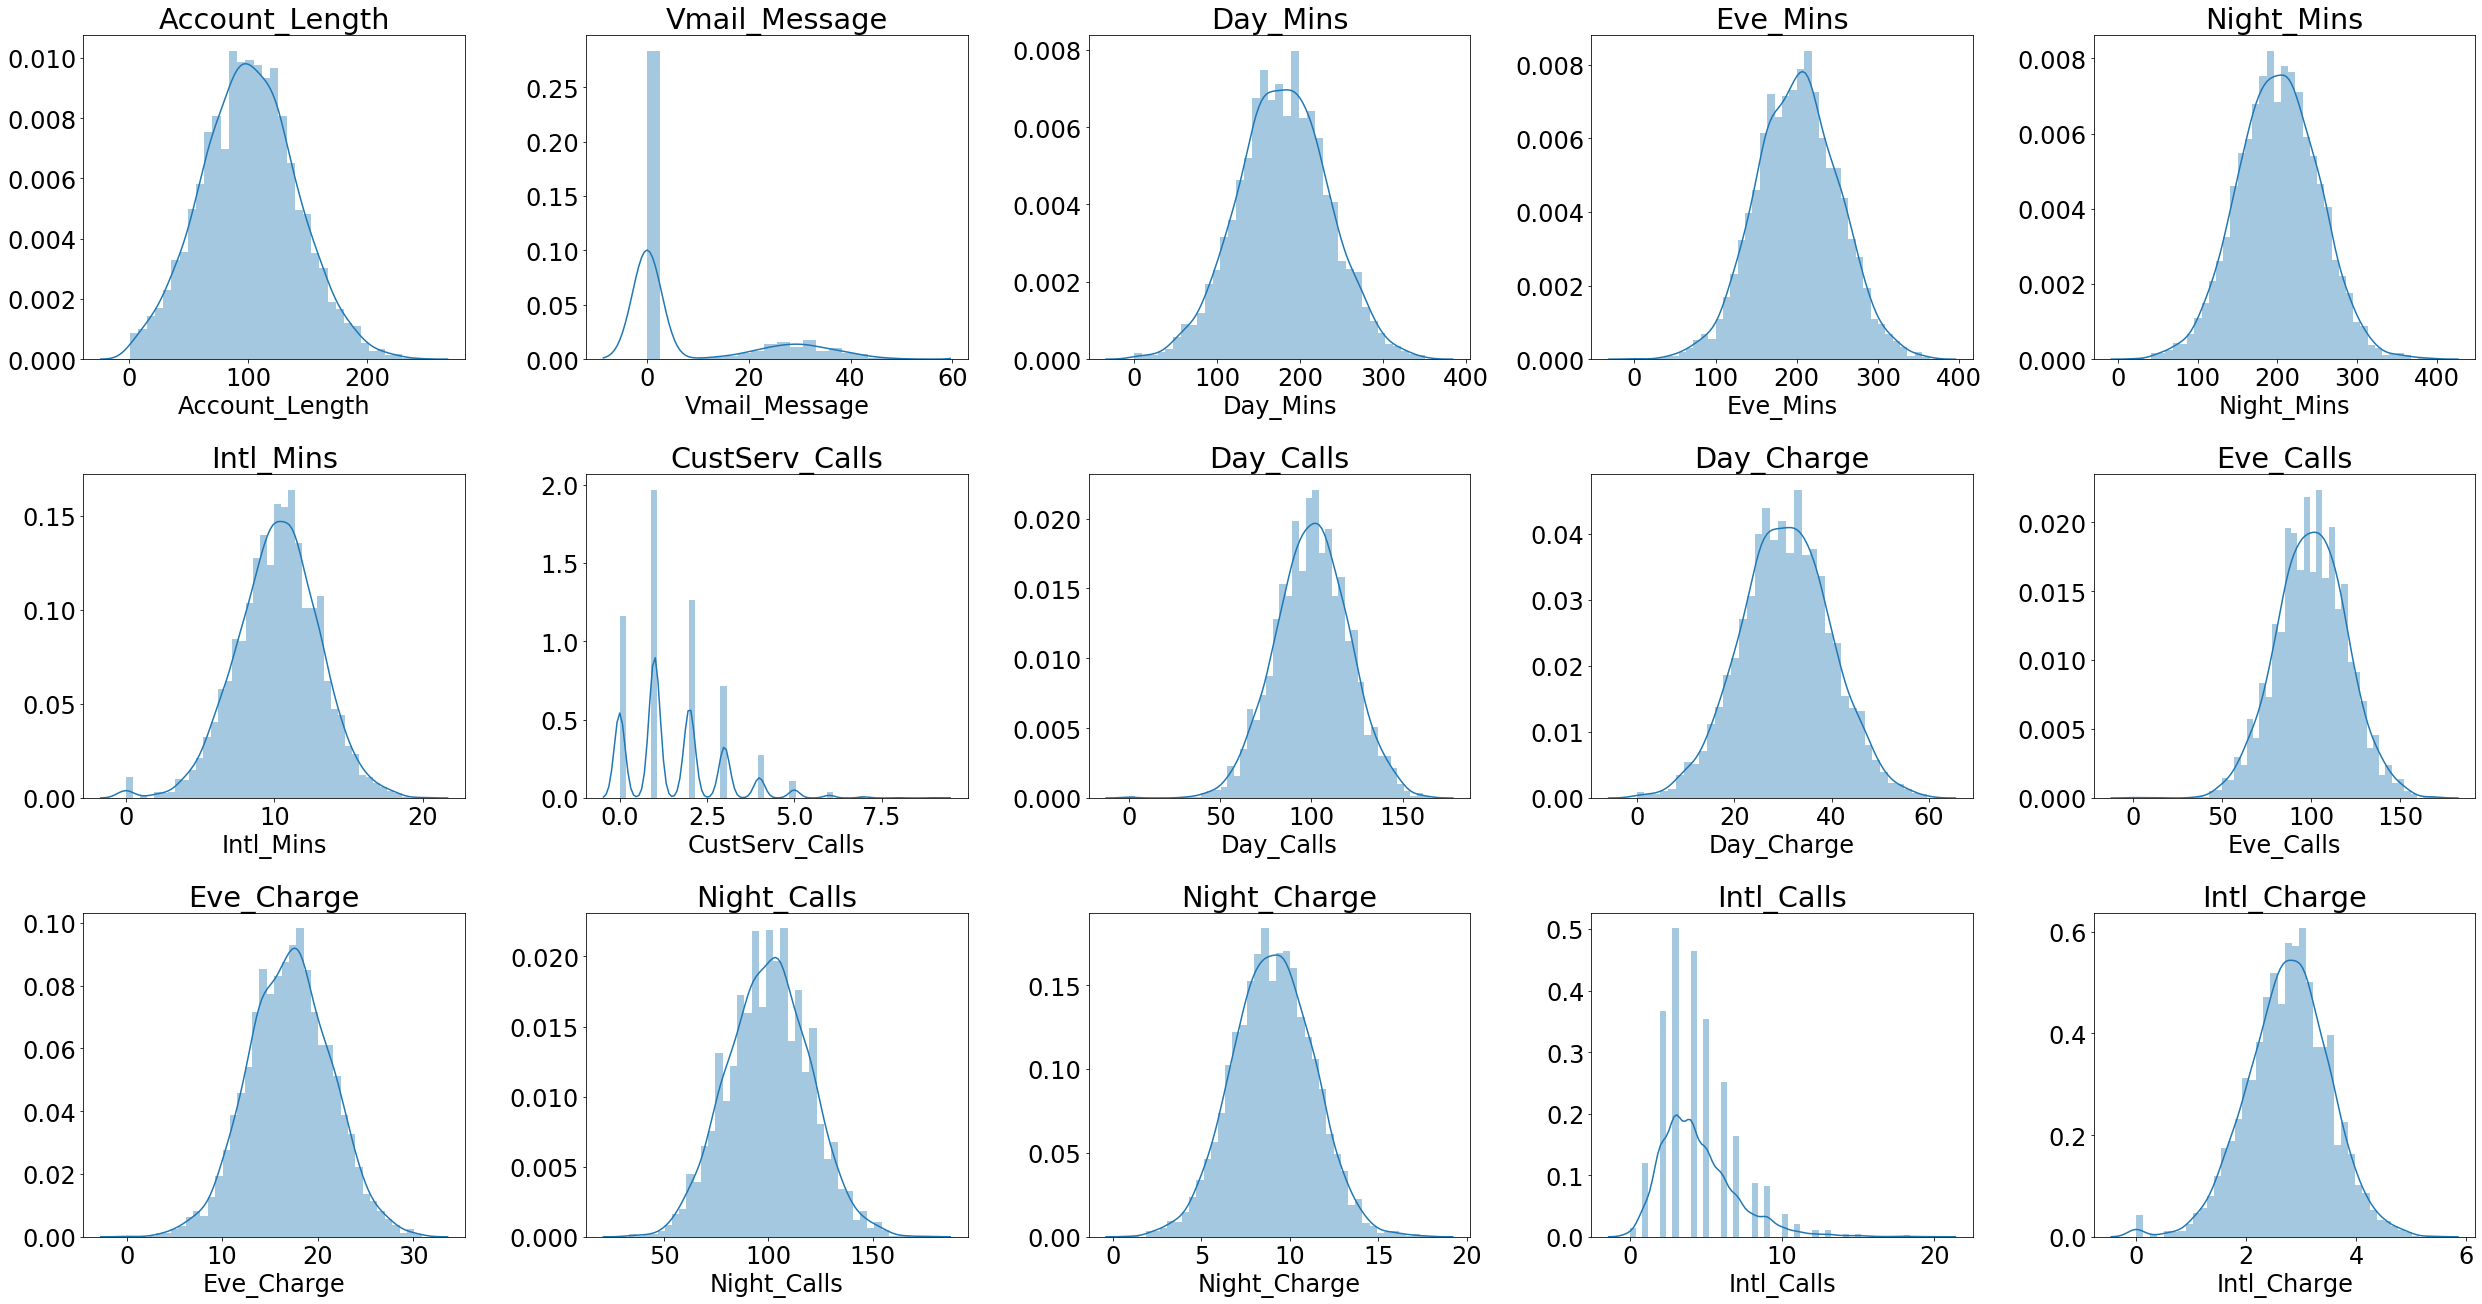

In [148]:
fig = plt.figure(figsize=(35,30))
fig.subplots_adjust(hspace=1, wspace=0.2)
plt.rcParams.update({'font.size': 24})
for c,num in zip(numeric_columns, range(1,16)):
    ax = fig.add_subplot(5,5, num)
    sns.distplot(df[c])
    ax.set_title(c)

plt.tight_layout()
plt.savefig("static/images/plot_feature_distribution.png", bbox_inches='tight')
plt.show()

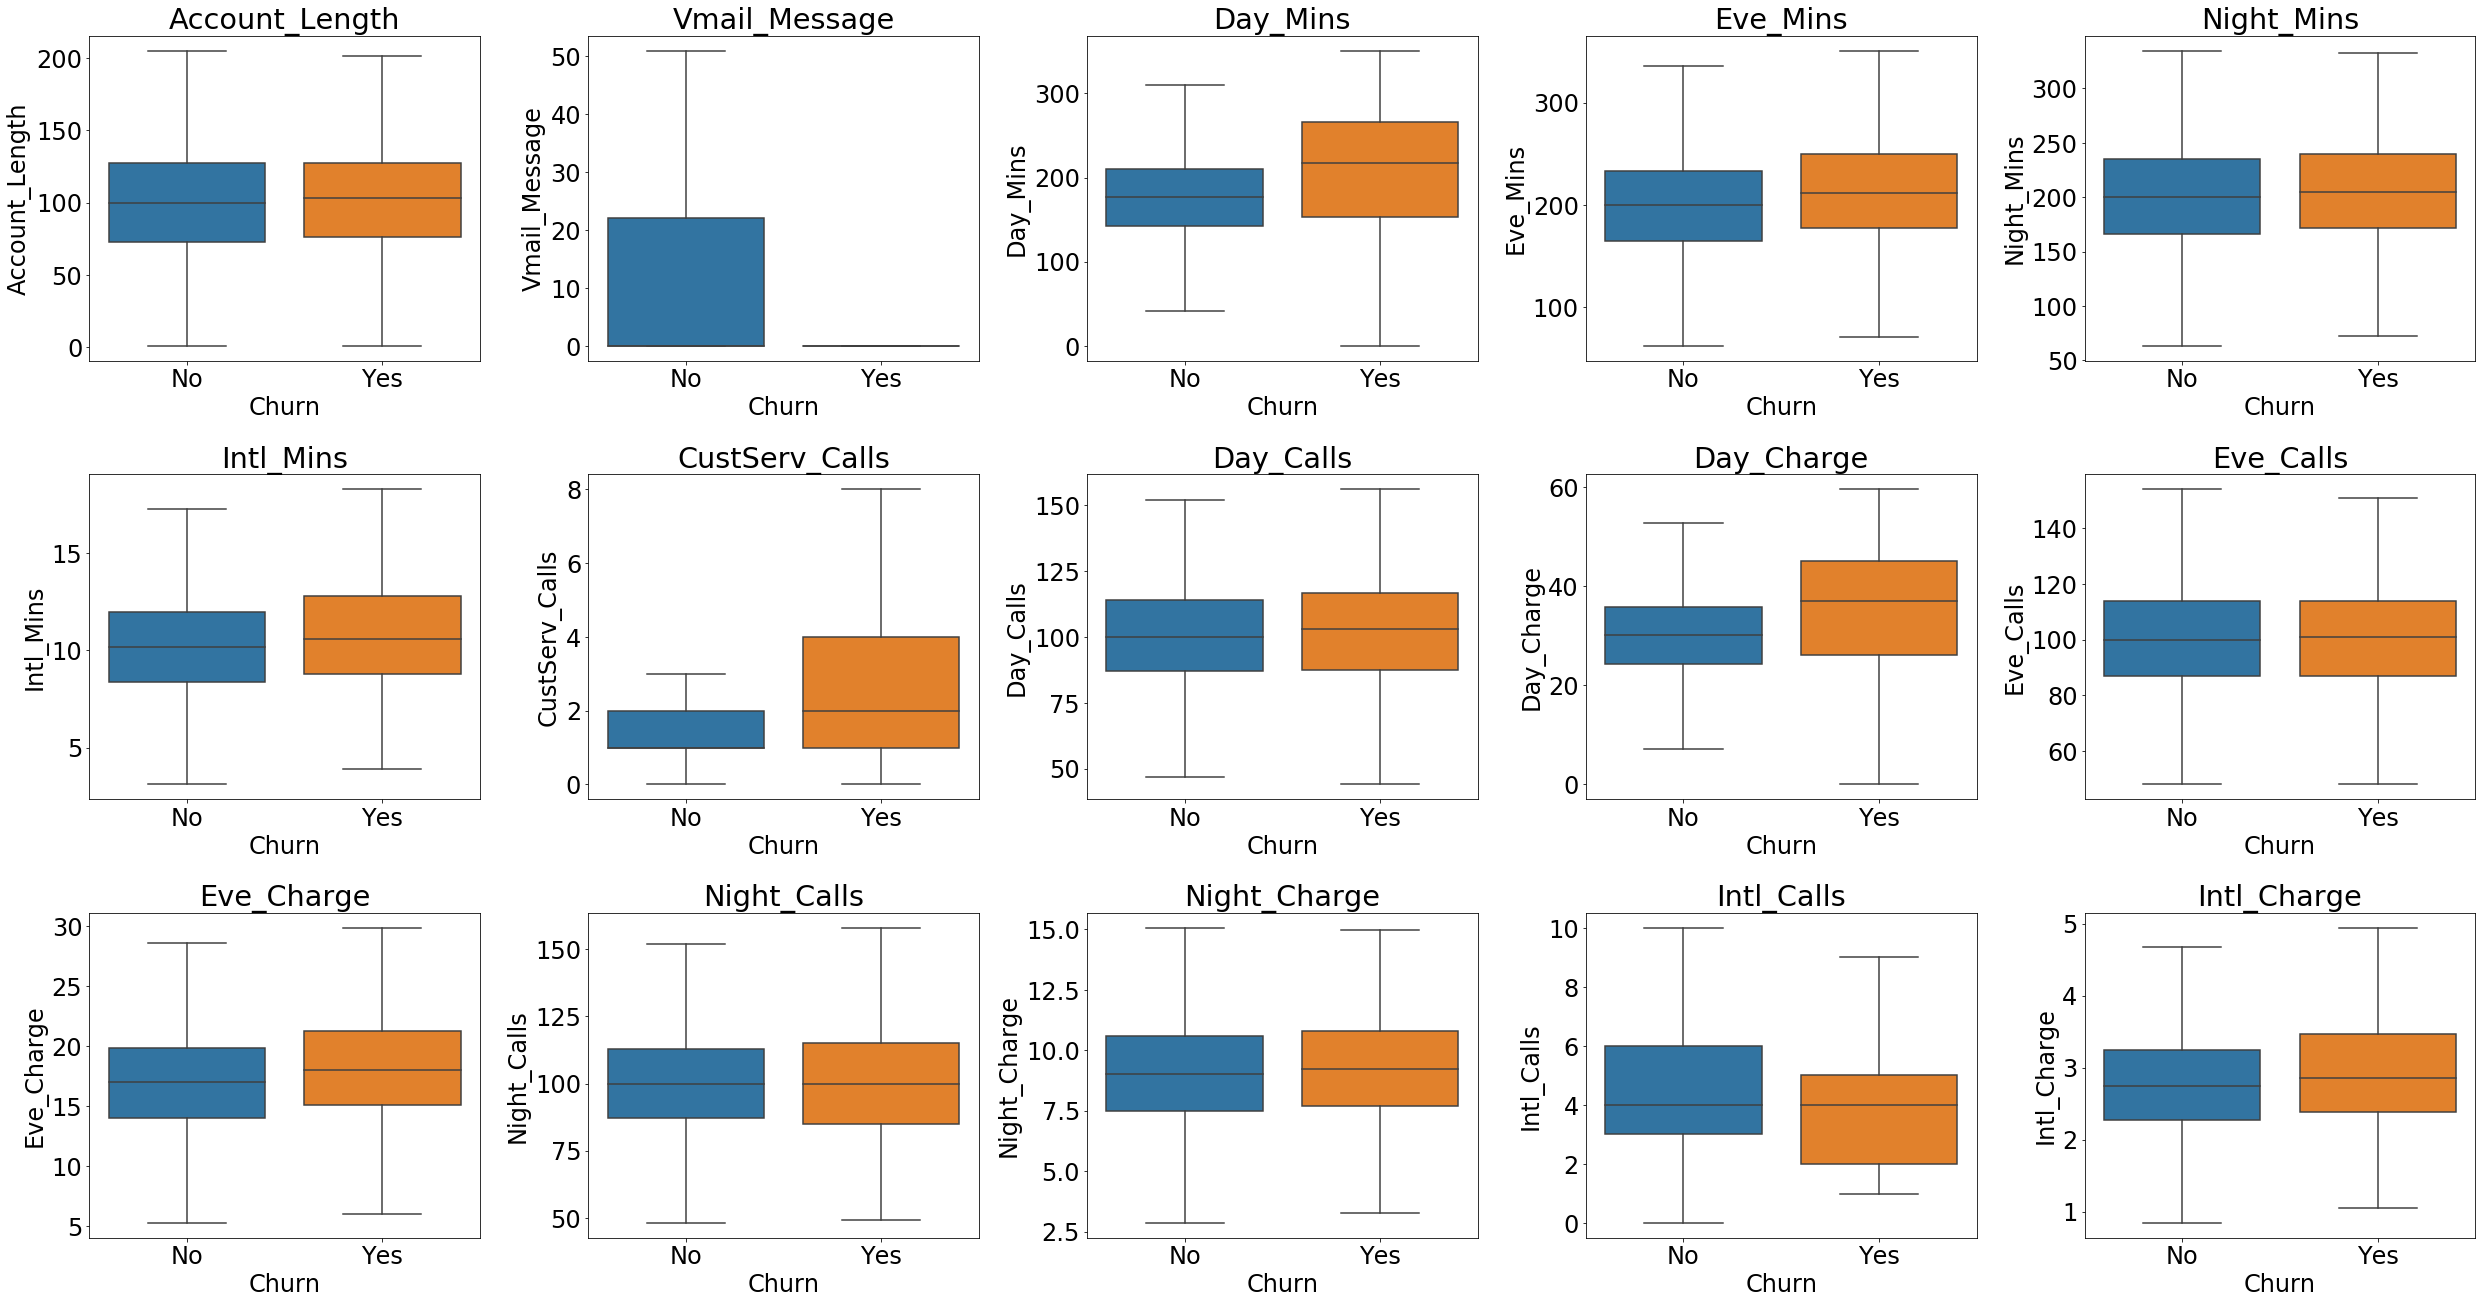

In [149]:
fig = plt.figure(figsize=(35,30))
fig.subplots_adjust(hspace=1, wspace=0.2)
plt.rcParams.update({'font.size': 24})
for c,num in zip(numeric_columns, range(1,16)):
    ax = fig.add_subplot(5,5, num)
    sns.boxplot(x='Churn', y=c, data=df, sym="")
    ax.set_xticklabels(['No', 'Yes'])
    ax.set_title(c)
    
plt.tight_layout()
plt.savefig("static/images/plot_allfeatures_boxplot.png", bbox_inches='tight')
plt.show()

### Potential Features Invovled in Churn: <font color="Red">Vmail_Messages, Day_Mins, CustServ_Calls, Day_Charge, Eve_Charge, Int'l_Calls, Int'l_Charge</font>

# Data Preparation

### Encode Categorical features

In [150]:
# Get list of columns that are object data types
obj_columns = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_columns.append(col)

In [151]:
# Convert binary features 
replace_dict = {'yes' : 1, "no" : 0}
for col in obj_columns:
    if len(df[col].unique()) == 2:
        df[col] = df[col].replace(replace_dict)

In [152]:
# Convert non-binary features to dummy
col_to_dummy = []
for col in obj_columns:
    if len(df[col].unique()) > 2:
        col_to_dummy.append(col)

## New Subset <font color="red">df_dummy</font> Data Dummyfied

In [153]:
# Convert the columns to be dummyfied using .get_dummies() method
df_dummy = pd.get_dummies(df, columns=col_to_dummy)

In [154]:
# Confirm that dataset has been 
df_dummy.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Feature Scaling

In [155]:
# Peepare a list to be rescaled
col_transform = ['Account_Length', 'Vmail_Message','Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']

In [156]:
# Scale features
df_dummy[col_transform] = StandardScaler().fit_transform(df_dummy[col_transform])

In [157]:
# Confirm they have been rescaled
df_dummy[col_transform].describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
count,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03
mean,1.470971e-16,7.035077e-17,7.312216e-16,-6.821892e-17,7.887813e-17,-3.336332e-16,8.527366e-18,-1.934646e-16,-2.835349e-16,3.288365e-16,1.385697e-16,-4.903235e-17,-4.370275e-17,-8.527366e-18,2.728757e-16
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-2.513172e+00,-5.917599e-01,-3.301096e+00,-3.963622e+00,-3.513648e+00,-3.667413e+00,-1.188218e+00,-5.005247e+00,-3.301162e+00,-5.025911e+00,-3.963679e+00,-3.429870e+00,-3.515366e+00,-1.820289e+00,-3.668210e+00
25%,-6.797448e-01,-5.917599e-01,-6.624241e-01,-6.780300e-01,-6.698545e-01,-6.223690e-01,-4.279320e-01,-6.695701e-01,-6.623760e-01,-6.583610e-01,-6.783123e-01,-6.699340e-01,-6.676792e-01,-6.011951e-01,-6.164341e-01
50%,-1.627644e-03,-5.917599e-01,-6.887677e-03,8.276141e-03,6.485803e-03,2.246393e-02,-4.279320e-01,2.812491e-02,-6.730063e-03,-5.738630e-03,8.459274e-03,-5.505089e-03,4.691242e-03,-1.948306e-01,2.045823e-02
75%,6.513740e-01,8.695542e-01,6.725198e-01,6.768330e-01,6.808485e-01,6.672969e-01,3.323545e-01,6.759846e-01,6.726790e-01,6.970854e-01,6.766695e-01,6.589239e-01,6.814562e-01,6.178983e-01,6.706192e-01
max,3.564766e+00,3.134591e+00,3.140422e+00,3.209066e+00,3.839081e+00,3.497397e+00,5.654360e+00,3.217588e+00,3.140803e+00,3.508382e+00,3.207980e+00,3.827739e+00,3.836763e+00,6.307001e+00,3.496829e+00


### Drop correlated features

In [158]:
# Evalute the correlations and identify those with values >0.9
# Do not show the states
df_dummy.corr().head(14)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012244,-0.011973,-0.013283,-0.002095,-0.004665,0.005286,-0.007661,0.015011,0.002926,0.029655,0.008147,0.014069,-0.019598,0.012885,-0.001830,-0.003267,0.021045,-0.031134,0.022449,-0.032599,0.015474,-0.011880,-0.011107,0.002046,-0.008526,-0.004099,-0.030404,0.013464,0.017790,-0.008036,0.002660,-0.003113,0.011432,0.006205,-0.001469,0.004234,0.024682,0.000396,0.008755,0.002986,-0.013766,0.014912,-0.026651,-0.013148,-0.000397,0.018810,0.012627,0.003555,-0.008476,-0.025631,0.018058
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,0.008818,-0.010587,-0.008509,0.014003,0.006683,0.002748,0.010664,0.015394,-0.011291,0.013806,0.017998,-0.002146,-0.002565,0.023181,-0.006998,0.001514,-0.005187,-0.010780,-0.001795,-0.001971,0.000622,-0.001969,0.003860,0.001914,-0.001648,0.013882,0.013067,0.010431,0.021232,0.004573,0.001613,0.011516,-0.016572,-0.013459,-0.022962,0.023676,0.005554,-0.021711,-0.005215,-0.007996,0.005781,0.023093,-0.009857,-0.017963,0.004353,-0.011911,-0.016959,-0.036747,0.002070,0.008308,-0.017748
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.003214,0.017954,-0.008702,-0.020992,0.007064,-0.002774,-0.012824,-0.019783,-0.013016,-0.000616,0.012373,-0.008900,-0.004591,-0.003176,-0.015111,0.045377,0.031684,-0.014841,-0.003201,0.000849,0.046941,0.013873,0.002248,0.010569,-0.023624,-0.004780,-0.015284,0.014232,0.019121,-0.005790,-0.005873,0.043592,-0.021099,-0.008741,-0.013676,0.009947,0.000338,-0.010031,0.018475,-0.031844,-0.033149,0.024650,-0.009345,0.004752,0.010353,-0.007147,0.006200,-0.002695,-0.001832,-0.019383,0.001115
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,-0.041457,-0.017065,0.000171,-0.036513,-0.004024,0.016551,0.008464,-0.011916,0.019569,0.025446,0.007998,-0.024159,0.012362,-0.018797,-0.010976,0.004594,0.004427,-0.012539,-0.007770,0.038061,-0.014209,-0.001265,0.021225,-0.005219,-0.002297,-0.002701,0.001554,0.004430,0.018451,0.005739,-0.007274,-0.007658,0.030446,0.005423,-0.012564,0.016671,-0.021441,0.001575,-0.021519,0.027975,0.017293,0.004654,0.023898,-0.003496,-0.016520,0.009816,0.012950,0.007933,-0.010750,-0.044919,0.014704
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.021274,-0.042137,0.011739,-0.019003,-0.004745,-0.030845,0.015273,0.013898,0.008176,-0.012968,-0.018084,0.007142,-0.021458,0.005101,-0.008598,0.027339,0.008973,-0.006680,0.001292,0.008745,-0.006540,-0.005549,-0.024309,0.028011,0.022712,0.000348,-0.010463,-0.010639,-0.002928,0.015002,0.020015,0.015731,-0.001847,0.021850,0.007574,0.011079,-0.010597,-0.002897,-0.011585,0.008870,-0.015357,0.001173,0.024018,-0.016406,-0.030421,0.036773,0.018102,-0.002323,-0.005028,0.000658,-0.005184
Intl_Mins,0.009

In [159]:
drop_corr_cols = ['Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge']

In [160]:
df_dummy = df_dummy.drop(drop_corr_cols, axis=1)

### Supervised Machine Learning

In [161]:
X = df_dummy.drop('Churn', axis=1)
y = df_dummy["Churn"]

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [169]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Evaluate Model Performance

In [172]:
score = clf.score(X_test, y_test)
print(f'The model accuracy is: {score}')

The model accuracy is: 0.913


In [173]:
y_pred = clf.predict(X_test)

In [174]:
# Prepare a confusion matrix (tn, fp, fn, tp)
cm = confusion_matrix(y_test, y_pred)

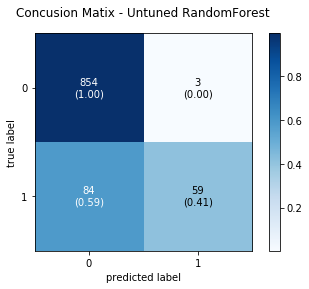

In [175]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plt.title('Concusion Matix - Untuned RandomForest')
plt.savefig("static/images/plot_untuned_randomforest_confusion_matrix.png", bbox_inches='tight')
plt.show()

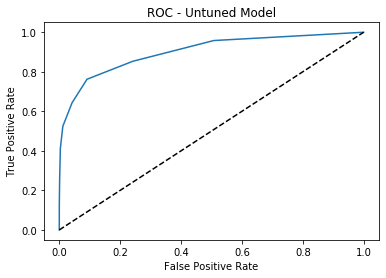

In [176]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.title('ROC - Untuned Model')
plt.savefig("static/images/plot_untuned_randomforest_ROC.png", bbox_inches='tight')
plt.show()

### Model Tuning Using: GridSearchCV
Key hyperparameters
 - n_estimators = number of trees in the foreset.
 - max_features = max number of features considered for splitting a node.
 - max_depth = max number of levels in each decision tree.
 - bootstrap = method for sampling data points (with or without replacement).
 - criterion = measure the quality of a split.

In [105]:
# Create the hyperparameter grid
param_grid = {'n_estimators' : np.arange(10,51),'max_features': ['auto', 'sqrt', 'log2'],
              "max_depth": [3, None], 
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [107]:
# Call GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

/Users/trinitycisneros/Documents/Coding/bitterscientist.com/wenv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'n_estimators': 33}


### Update Model

In [177]:
# Instantiate the classifier
clf = RandomForestClassifier(bootstrap=False, criterion='gini', 
                             max_depth=None, max_features=10, n_estimators=33)

# Fit the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=33,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [178]:
score = clf.score(X_test, y_test)
print(f'The updated model accuracy score is: {score}')

The updated model accuracy score is: 0.934


In [117]:
y_pred = clf.predict(X_test)

In [118]:
# Prepare a confusion matrix (tn, fp, fn, tp)
cm = confusion_matrix(y_test, y_pred)

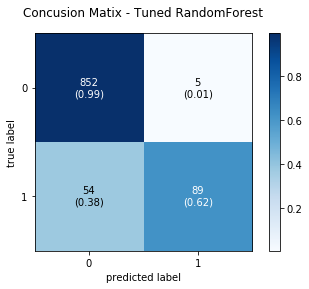

In [119]:
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title('Concusion Matix - Tuned RandomForest')
plt.savefig("static/images/plot_finetuned_randomforest_confusion_matrix.png", bbox_inches='tight')
plt.show()

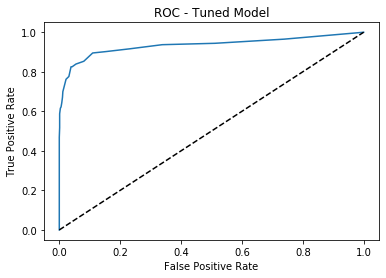

In [120]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.title('ROC - Tuned Model')
plt.savefig("static/images/plot_tuned_randomforest_ROC.png", bbox_inches='tight')
plt.show()

In [121]:
# Calculate feature importances
importances = clf.feature_importances_

<Figure size 432x288 with 0 Axes>

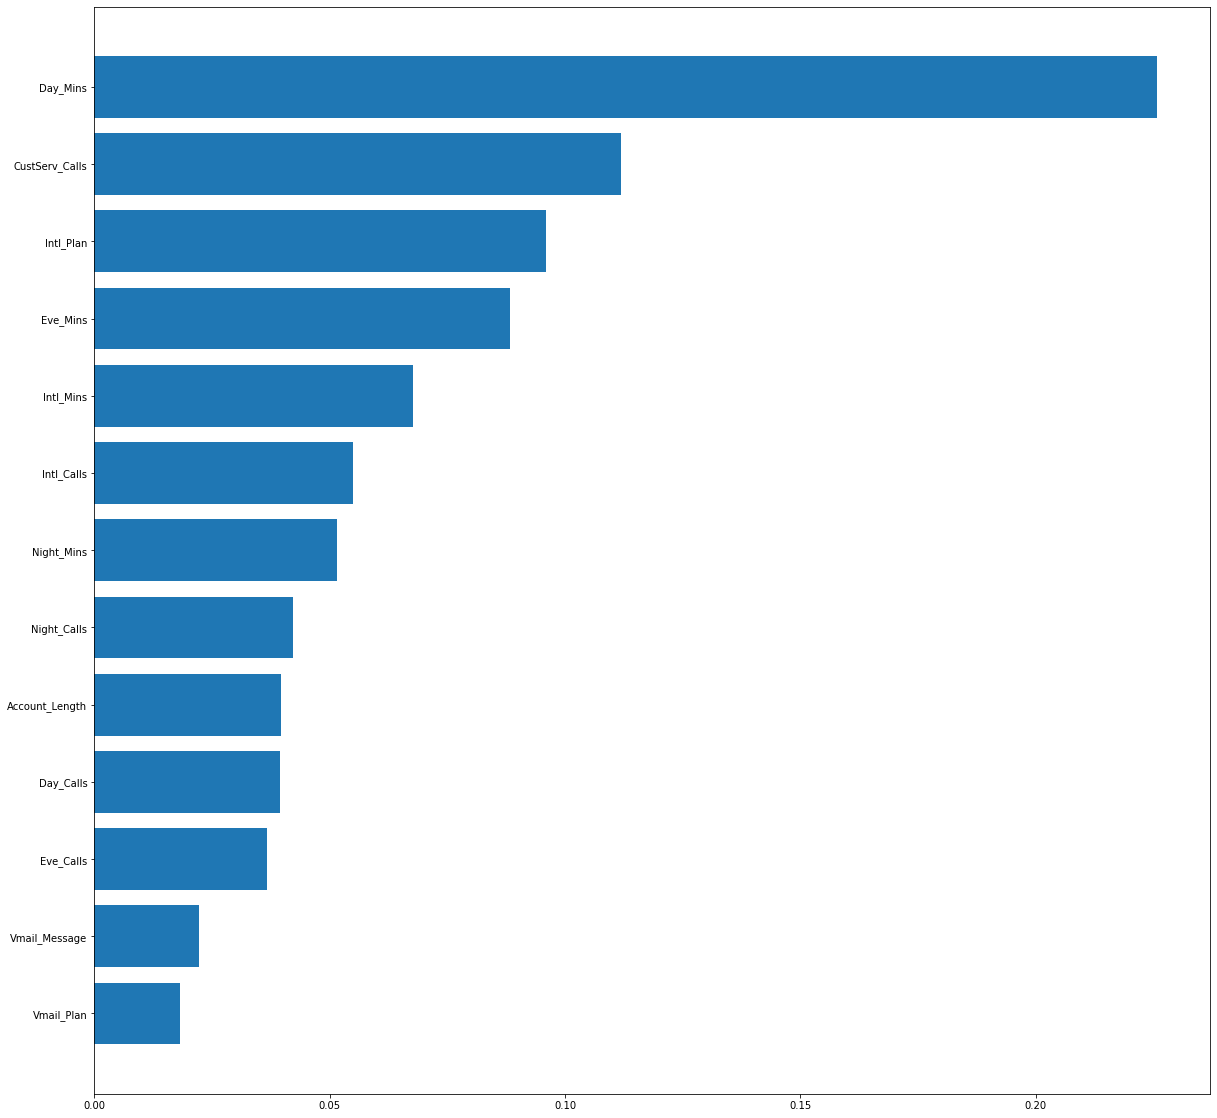

In [141]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels (only get the non state features)
labels = X.columns[sorted_index][-13:]

# Clear current plot
plt.clf()

# Create plot
plt.figure(figsize=(20,20))
plt.barh(range(X.shape[1])[-13:], importances[sorted_index][-13:], tick_label=labels)
plt.savefig("static/images/plot_tuned_randomforest_features.png", bbox_inches='tight')
plt.show()